In [5]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import CNN_softmax_and_SVM

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train / 255., x_test / 255.

step: 250, loss: 99.866241, accuracy: 0.700000
step: 500, loss: 63.346558, accuracy: 0.820000
step: 750, loss: 51.623413, accuracy: 0.900000
step: 1000, loss: 48.991749, accuracy: 0.840000
step: 1250, loss: 31.196465, accuracy: 0.910000
step: 1500, loss: 20.465103, accuracy: 0.960000
step: 1750, loss: 26.489023, accuracy: 0.920000
step: 2000, loss: 10.703158, accuracy: 0.980000
step: 2250, loss: 8.298492, accuracy: 0.990000
step: 2500, loss: 11.530598, accuracy: 0.960000
step: 2750, loss: 3.945045, accuracy: 1.000000
step: 3000, loss: 2.039862, accuracy: 1.000000
step: 3250, loss: 2.789391, accuracy: 0.990000
step: 3500, loss: 1.546202, accuracy: 1.000000
step: 3750, loss: 6.150077, accuracy: 0.980000
step: 4000, loss: 0.573326, accuracy: 1.000000
step: 4250, loss: 1.162972, accuracy: 1.000000
step: 4500, loss: 0.473822, accuracy: 1.000000
step: 4750, loss: 0.167396, accuracy: 1.000000
step: 5000, loss: 0.930209, accuracy: 1.000000


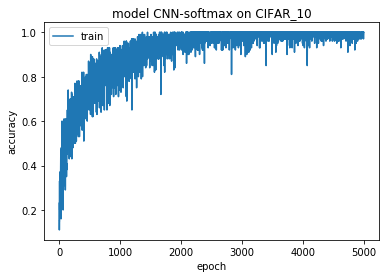

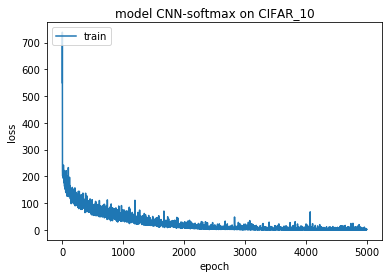

The accuracy of CNN-softmax on the testset is 0.6913999915122986


In [6]:
model = CNN_softmax_and_SVM.CNN_softmax( num_classes = 10, 
                     conv1_filters = 32, # number of filters for 1st conv layer.
                     conv2_filters = 64, # number of filters for 2nd conv layer.
                     fc1_units = 3072, # number of neurons for 1st fully-connected layer.
                     kernel_len = 5)

step_list, loss_list, acc_list = model.fit( x_train, y_train, 
                                            image_width = 32, 
                                            optimizer = tf.optimizers.RMSprop(learning_rate=0.001),
                                            training_steps = 5000, 
                                            display_step = 250 , 
                                            batch_size = 100,
                                            pooling_merge_number = 2, 
                                            dropout_rate = 0.2,
                                            channels = 3,)
CNN_softmax_and_SVM.draw( datasetname = "CIFAR_10",modelname = model.name, 
                         step_list = step_list, acc_list = acc_list, loss_list = loss_list)
model.evaluate(x_test,tf.transpose(y_test)[0])

step: 250, loss: 276.870575, accuracy: 0.520000
step: 500, loss: 178.436142, accuracy: 0.670000
step: 750, loss: 150.671188, accuracy: 0.770000
step: 1000, loss: 126.676956, accuracy: 0.910000
step: 1250, loss: 108.972939, accuracy: 0.890000
step: 1500, loss: 86.367691, accuracy: 0.960000
step: 1750, loss: 63.804863, accuracy: 0.970000
step: 2000, loss: 58.304123, accuracy: 0.970000
step: 2250, loss: 36.951591, accuracy: 0.980000
step: 2500, loss: 33.039555, accuracy: 1.000000
step: 2750, loss: 42.456345, accuracy: 0.990000
step: 3000, loss: 27.293118, accuracy: 0.990000
step: 3250, loss: 20.425983, accuracy: 1.000000
step: 3500, loss: 30.582260, accuracy: 1.000000
step: 3750, loss: 20.521603, accuracy: 1.000000
step: 4000, loss: 26.733566, accuracy: 0.980000
step: 4250, loss: 19.038412, accuracy: 1.000000
step: 4500, loss: 12.760134, accuracy: 1.000000
step: 4750, loss: 16.285755, accuracy: 1.000000
step: 5000, loss: 12.846148, accuracy: 1.000000


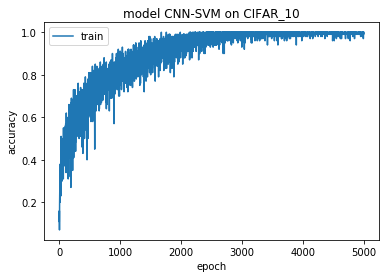

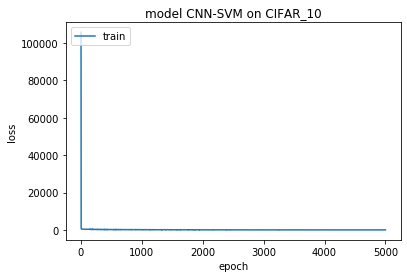

The accuracy of CNN-SVM on the testset is 0.7250999808311462


In [8]:
model = CNN_softmax_and_SVM.CNN_SVM( num_classes = 10, 
                     conv1_filters = 32, # number of filters for 1st conv layer.
                     conv2_filters = 64, # number of filters for 2nd conv layer.
                     fc1_units = 3072, # number of neurons for 1st fully-connected layer.
                     penality_parameter= 1,
                     kernel_len = 5)

step_list, loss_list, acc_list = model.fit( x_train, y_train, 
                                            image_width = 32, 
                                            optimizer = tf.optimizers.RMSprop(learning_rate=0.001),
                                            training_steps = 5000, 
                                            display_step = 250 , 
                                            batch_size = 100,
                                            pooling_merge_number = 2, 
                                            dropout_rate = 0.2,
                                            channels = 3,)
CNN_softmax_and_SVM.draw( datasetname = "CIFAR_10",modelname = model.name, 
                         step_list = step_list, acc_list = acc_list, loss_list = loss_list)

model.evaluate(x_test,tf.transpose(y_test)[0])

Text(0.5, 1.0, 'model CNN-SVM on CIFAR_10')

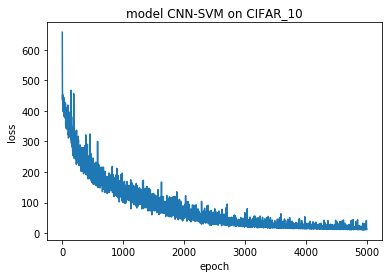

In [16]:
plt.plot(loss_list[3:])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model CNN-SVM on CIFAR_10')

$\textbf{Explanation:}$
Here, the first three losses, which are 105762,1917,657, are tremendously larger than the rest, so the first loss plot looks weird and the second one is much better.